<a href="https://colab.research.google.com/github/haraleks/ds_school_2020/blob/master/task%201/Roonyx_task_1_Aleksandr_Kharchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
# pip install seaborn 
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
from google.colab import files
uploaded = files.upload()

Saving houses_to_rent_v2.csv to houses_to_rent_v2.csv


In [5]:
ls

houses_to_rent_v2.csv  sample_data/


In [0]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [7]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [8]:
df.shape

(10692, 13)

In [9]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  bool  
 7   furniture            10692 non-null  bool  
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: bool(2), int64(9), object(2)
memory usage: 939.9+ KB


In [21]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [22]:
data.describe(include=['object', 'bool'])

,city,floor,animal,furniture
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,True,False
freq,5887,2461,8316,8086


In [0]:
data1 = df.copy()

In [35]:
d = {'not furnished' : 0, 'furnished' : 1}
data1['furniture'] = data1['furniture'].map(d)
data1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [17]:
d = {'not furnished' : False, 'furnished' : True}
data['furniture'] = data['furniture'].map(d)
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836


In [30]:
data.groupby(['city']).describe(percentiles=[])

area                           ... total (R$)                   
                 count        mean          std  ...        min     50%        max
city                                             ...                              
Belo Horizonte  1258.0  207.411765  1312.428950  ...      499.0  3040.0  1120000.0
Campinas         853.0  137.561547   448.843132  ...      711.0  2140.0    20560.0
Porto Alegre    1193.0  103.609388   101.522925  ...      509.0  2211.0    32750.0
Rio de Janeiro  1501.0  105.347768    93.485031  ...      507.0  3253.0    95610.0
São Paulo       5887.0  158.899439   347.474169  ...      508.0  4596.0   316900.0

[5 rows x 54 columns]

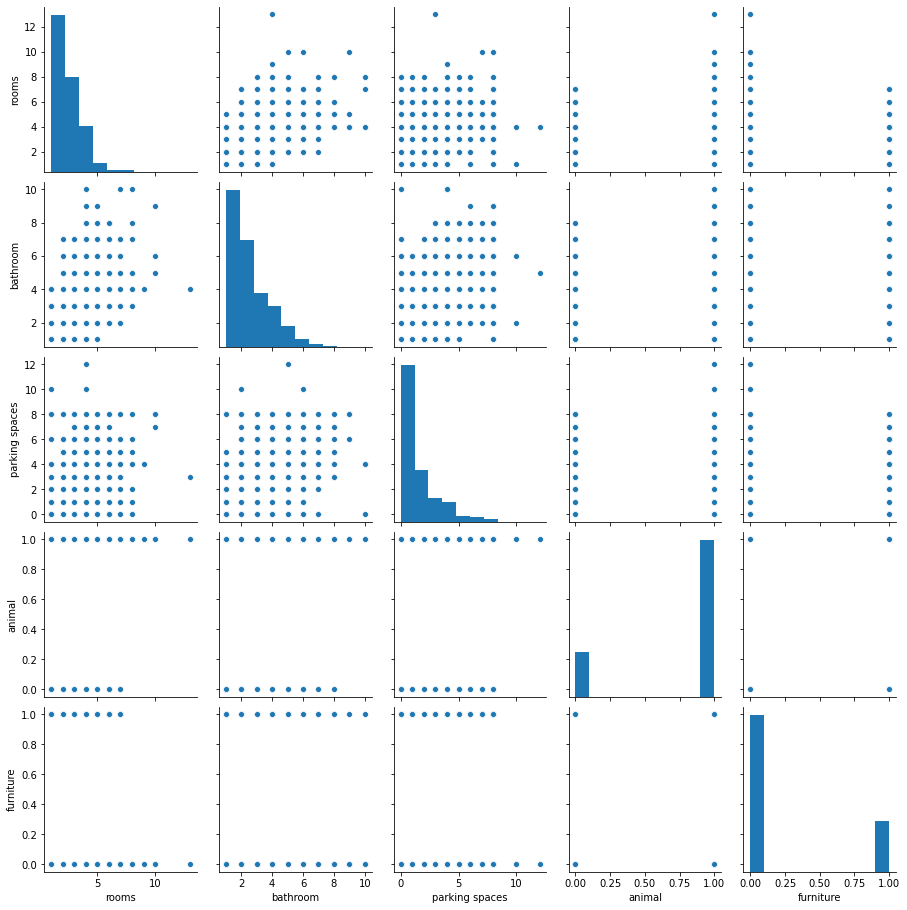

In [39]:
cols = ['rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']
sns_plot = sns.pairplot(data1[cols])
sns_plot.savefig('pairplot.png')

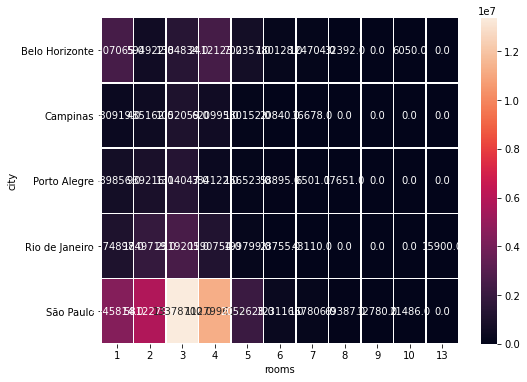

In [40]:
platform_room_sales = data1.pivot_table(
                        index='city', 
                        columns='rooms', 
                        values='total (R$)', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_room_sales, annot=True, fmt=".1f", linewidths=.5)

In [41]:
data.groupby(['city','rooms']).describe(percentiles=[])

area              ... total (R$)           
                       count        mean  ...        50%        max
city           rooms                      ...                      
Belo Horizonte 1       150.0   43.786667  ...     1520.0  1120000.0
               2       286.0   76.304196  ...     1541.0    17920.0
               3       389.0  147.647815  ...     2579.0    19590.0
               4       317.0  391.006309  ...     6288.0    27760.0
               5        78.0  421.730769  ...     8213.0    25580.0
               6        20.0  487.700000  ...     8490.0    16250.0
               7        13.0  469.307692  ...     8560.0    16410.0
               8         4.0  514.500000  ...     6383.0    15060.0
               10        1.0  341.000000  ...     6050.0     6050.0
Campinas       1       218.0   52.587156  ...     1469.5     7012.0
               2       253.0   72.130435  ...     1523.0     7492.0
               3       271.0  192.143911  ...     3006.0    19060.0
               4        91.0  292.791209  ...     5631.0    20560.0
               5        14.0  489.500000  ...     9181.0    16610.0
               6         4.0  301.000000  ...     4959.0     8746.0
               7         2.0  427.500000  ...     8339.0    10050.0
Porto Alegre   1       374.0   45.098930  ...     1461.5    32750.0
               2       424.0   77.905660  ...     1893.5    15240.0
               3       299.0  150.665552  ...     3388.0    23250.0
               4        62.0  240.322581  ...     5235.5    19720.0
               5        22.0  434.863636  ...     6369.0    13380.0
               6         9.0  311.555556  ...     5113.0    15730.0
               7         1.0  387.000000  ...     6501.0     6501.0
               8         2.0  500.000000  ...     8825.5    12210.0
Rio de Janeiro 1       404.0   40.688119  ...     2132.0    95610.0
               2       522.0   80.726054  ...     2714.0    32180.0
               3       422.0  138.440758  ...     4885.5    20830.0
               4       128.0  227.460938  ...     8158.0    21350.0
               5        18.0  466.888889  ...    10625.0    23570.0
               6         3.0  573.333333  ...     9847.0    14700.0
               7         3.0  483.333333  ...    15230.0    17660.0
               13        1.0  439.000000  ...    15900.0    15900.0
São Paulo      1      1308.0   45.388379  ...     2589.0   316900.0
               2      1490.0   86.726174  ...     2946.5    25180.0
               3      1888.0  175.872352  ...     5871.5    31010.0
               4       988.0  307.168016  ...    10455.0   222100.0
               5       156.0  555.435897  ...    10645.0   233200.0
               6        32.0  420.531250  ...     9349.0    30660.0
               7        17.0  465.941176  ...     9564.0    20230.0
               8         5.0  419.200000  ...    11460.0    27580.0
               9         1.0  400.000000  ...    12780.0    12780.0
               10        2.0  400.000000  ...    10743.0    12480.0

[42 rows x 48 columns]

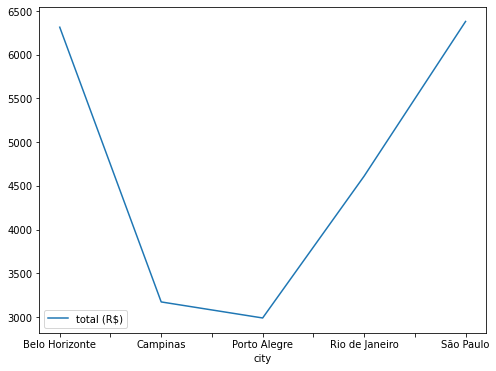

In [70]:
total_mean_df = data1[[x for x in data1.columns if 'total (R$)' in x] + ['city']]
total_mean_df.groupby('city').mean().plot()

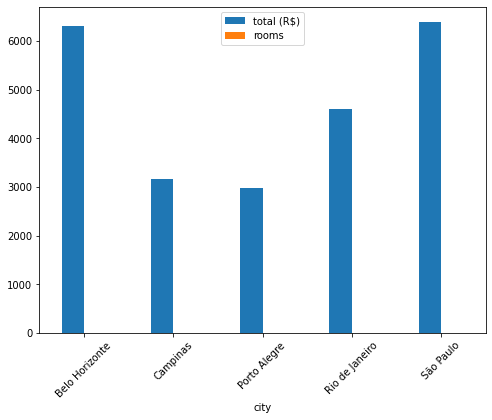

In [69]:
total_mean_df.groupby('city').mean().plot(kind='bar', rot=45)

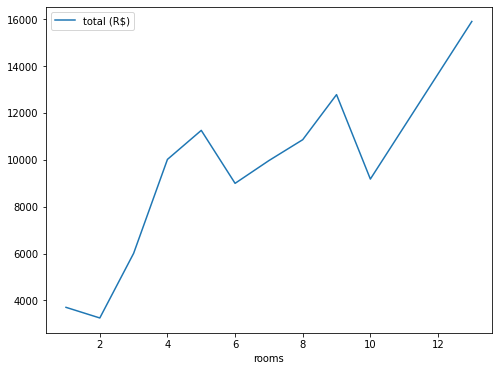

In [62]:
rooms_mean_df = data1[[x for x in data1.columns if 'total (R$)' in x] + ['rooms']]
rooms_mean_df.groupby('rooms').mean().plot()

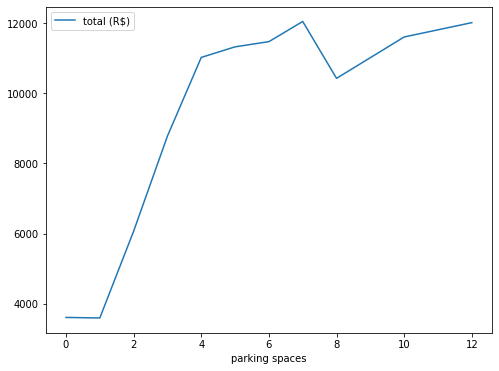

In [63]:
parcing_mean_df = data1[[x for x in data1.columns if 'total (R$)' in x] + ['parking spaces']]
parcing_mean_df.groupby('parking spaces').mean().plot()

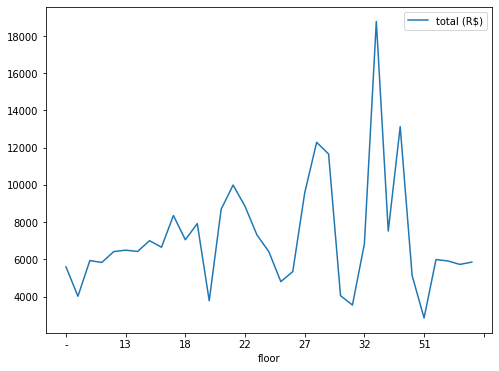

In [64]:
floor_mean_df = data1[[x for x in data1.columns if 'total (R$)' in x] + ['floor']]
floor_mean_df.groupby('floor').mean().plot()

In [74]:
data1['total (R$)'].mean()

5490.4869996258885

In [76]:
data1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),total_opt
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,5.618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973,7.973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841,3.841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421,1.421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836,0.836


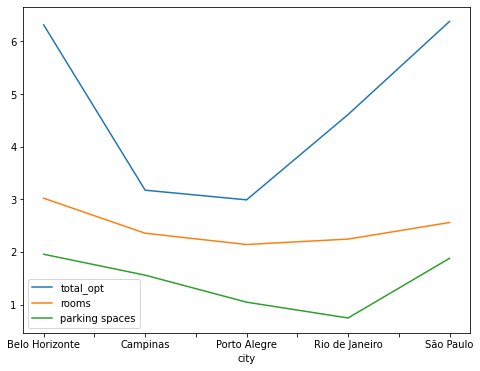

In [80]:
col_filt = ['city', 'rooms', 'floor', 'parking spaces']
total_mean_df = data1[[x for x in data1.columns if 'total_opt' in x] + col_filt]
total_mean_df.groupby('city').mean().plot()

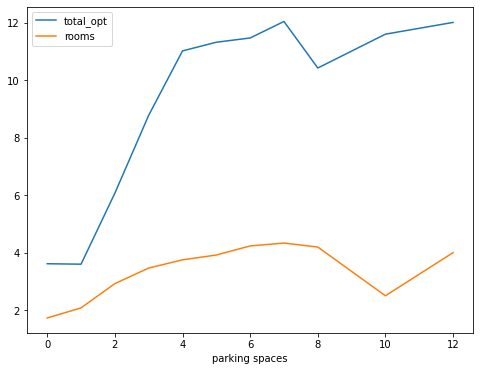

In [84]:
col_filt = ['city', 'rooms', 'floor', 'parking spaces']
total_mean_df = data1[[x for x in data1.columns if 'total_opt' in x] + col_filt]
total_mean_df.groupby('parking spaces').mean().plot()

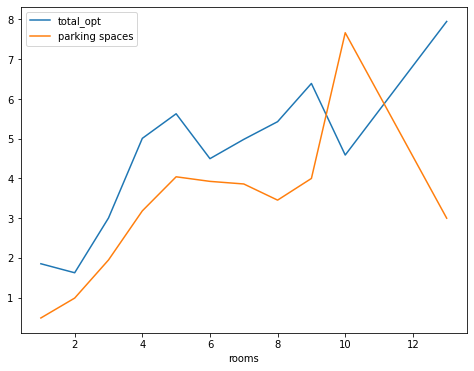

In [127]:
col_filt = ['city', 'rooms', 'floor', 'parking spaces']
rooms_mean_df = data1[[x for x in data1.columns if 'total_opt' in x] + col_filt]
rooms_mean_df.groupby('rooms').mean().plot()

In [0]:
data_group_city = data1.groupby('city')

In [131]:
data_group_city

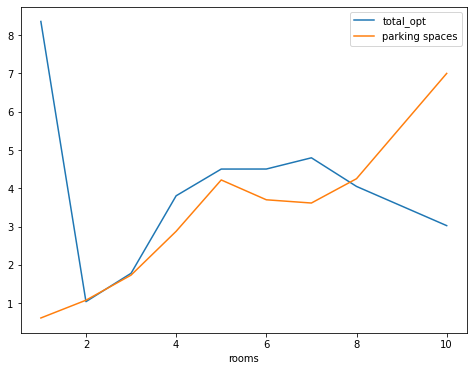

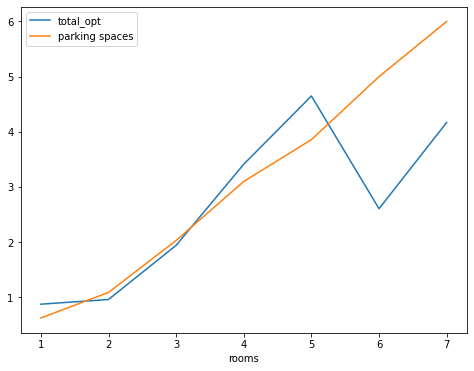

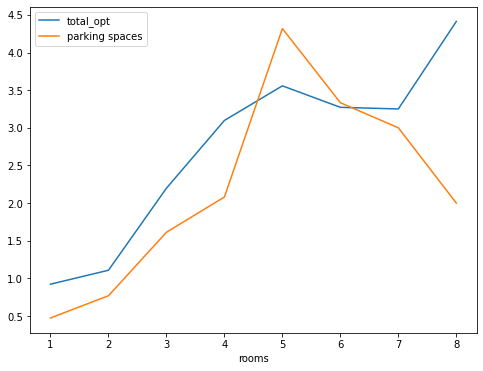

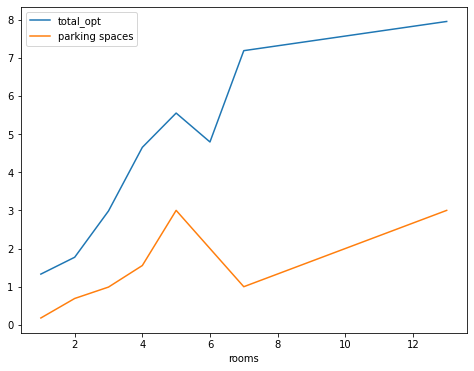

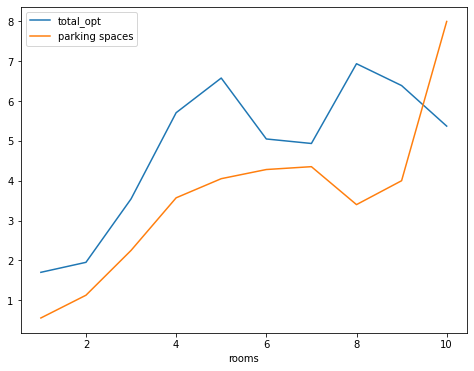

In [138]:
data_group_city = data1.groupby('city')
for gr in data_group_city:  
  col_filt = ['city', 'rooms', 'floor', 'parking spaces']
  rooms_mean_df = gr[1][[x for x in data1.columns if 'total_opt' in x] + col_filt]
  rooms_mean_df.groupby('rooms').mean().plot()

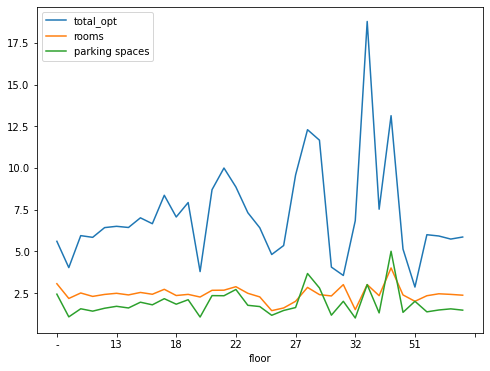

In [85]:
col_filt = ['city', 'rooms', 'floor', 'parking spaces']
total_mean_df = data1[[x for x in data1.columns if 'total_opt' in x] + col_filt]
total_mean_df.groupby('floor').mean().plot()

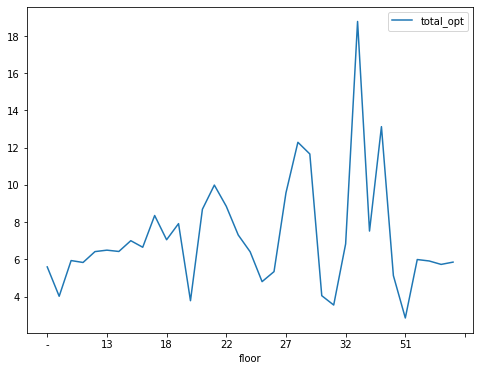

In [86]:
col_filt = ['city', 'rooms', 'floor', 'parking spaces', 'f']
total_mean_df = data1[[x for x in data1.columns if 'total_opt' in x] + col_filt]
total_mean_df.groupby('floor').mean().plot()

In [0]:
data1['total_opt'] = data1['total (R$)']/2000

In [0]:
data1['furniture_opt'] = data1['furniture']

In [0]:
data1['animal_opt'] = data1['animal']

In [0]:
data2 = data1.sort_values('rooms')

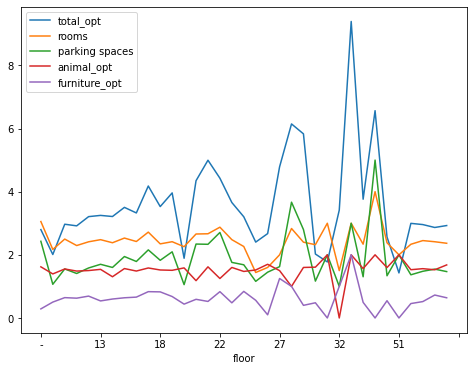

In [117]:
col_filt = ['city', 'rooms', 'floor', 'parking spaces', 'animal_opt',	'furniture_opt']
total_mean_df = data2[[x for x in data2.columns if 'total_opt' in x] + col_filt]
total_mean_df.groupby('floor').mean().plot()

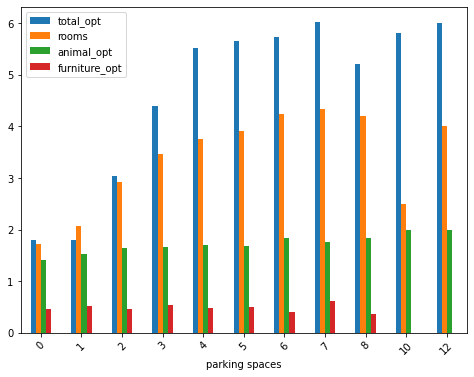

In [118]:
total_mean_df.groupby('parking spaces').mean().plot(kind='bar', rot=45)

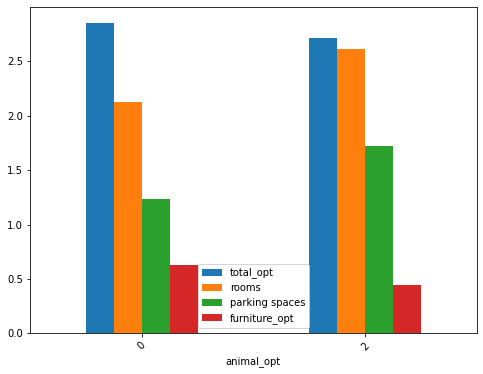

In [119]:
total_mean_df.groupby('animal_opt').mean().plot(kind='bar', rot=45)

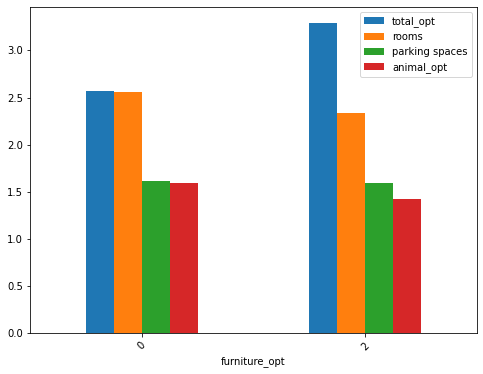

In [120]:
total_mean_df.groupby('furniture_opt').mean().plot(kind='bar', rot=45)

In [0]:
data1.sort_values('total_opt', ascending=False)
data_new = data1.drop([6979, 255])

In [146]:
data_new.sort_values('total_opt', ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),total_opt,furniture_opt,animal_opt
6645,São Paulo,42,1,2,1,6,0,0,690,2500,313700,32,316900,158.4500,0,0
6230,São Paulo,340,5,4,2,7,1,0,220000,12000,1000,153,233200,116.6000,0,1
2859,São Paulo,285,4,5,4,6,1,1,200000,20000,1834,254,222100,111.0500,1,1
2928,Rio de Janeiro,35,1,1,0,1,1,1,81150,4500,9900,58,95610,47.8050,1,1
2182,São Paulo,700,4,7,8,-,1,0,0,45000,8750,677,54430,27.2150,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,Porto Alegre,30,1,1,0,-,0,0,0,500,0,9,509,0.2545,0,0
5152,São Paulo,35,1,1,0,-,0,0,0,500,0,8,508,0.2540,0,0
5876,Rio de Janeiro,30,1,1,1,3,1,0,0,500,0,7,507,0.2535,0,1
9317,Rio de Janeiro,30,1,1,1,3,1,0,0,500,0,7,507,0.2535,0,1


In [0]:
data_new['rent amount_opt'] = data_new['rent amount (R$)']/1000

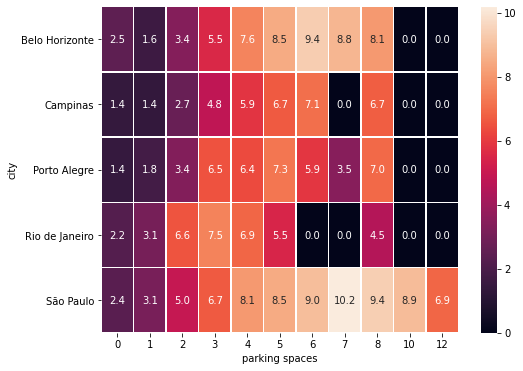

In [154]:
platform_room_sales = data_new.pivot_table(
                        index='city', 
                        columns='parking spaces', 
                        values='rent amount_opt', 
                        aggfunc='mean').fillna(0).applymap(float)
sns.heatmap(platform_room_sales, annot=True, fmt=".1f", linewidths=.5)

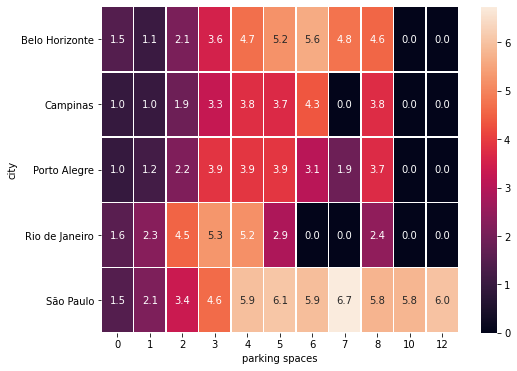

In [155]:
platform_room_sales = data_new.pivot_table(
                        index='city', 
                        columns='parking spaces', 
                        values='total_opt', 
                        aggfunc='mean').fillna(0).applymap(float)
sns.heatmap(platform_room_sales, annot=True, fmt=".1f", linewidths=.5)

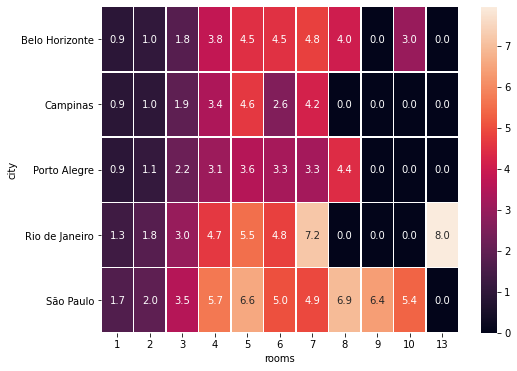

In [156]:
platform_room_sales = data_new.pivot_table(
                        index='city', 
                        columns='rooms', 
                        values='total_opt', 
                        aggfunc='mean').fillna(0).applymap(float)
sns.heatmap(platform_room_sales, annot=True, fmt=".1f", linewidths=.5)

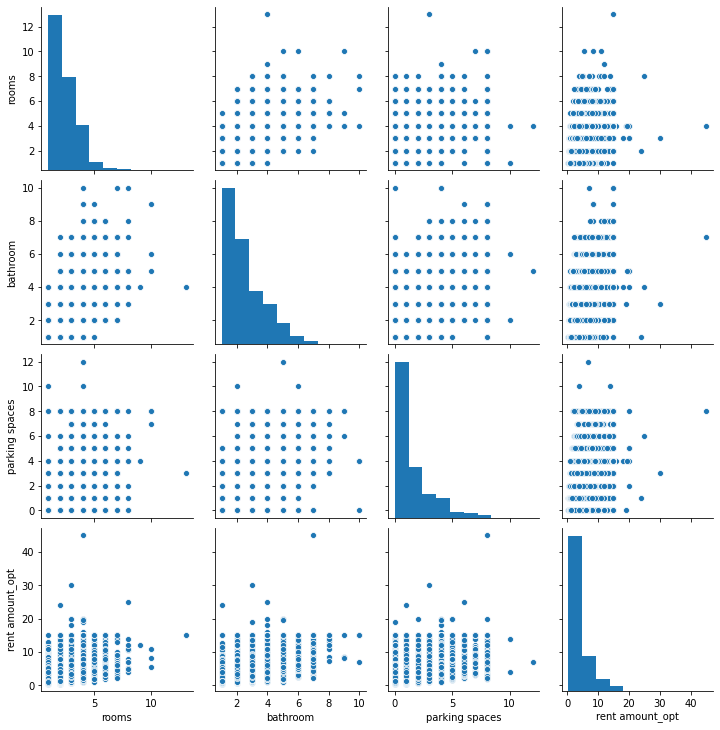

In [163]:
cols = ['rooms', 'bathroom', 'parking spaces', 'floor', 'rent amount_opt']
sns_plot = sns.pairplot(data_new[cols])
sns_plot.savefig('pairplot.png')

In [121]:
data2['city'].unique()

array(['São Paulo', 'Campinas', 'Rio de Janeiro', 'Porto Alegre',
       'Belo Horizonte'], dtype=object)

In [126]:
columns_to_show = 'total (R$)'
data2.groupby(['city'])[columns_to_show].describe(percentiles=[])


,count,mean,std,min,50%,max
city,,,,,,
Belo Horizonte,1258.0,6315.242448,44654.831555,499.0,3040.0,1120000.0
Campinas,853.0,3173.276671,2857.281849,711.0,2140.0,20560.0
Porto Alegre,1193.0,2989.782900,2734.499521,509.0,2211.0,32750.0
Rio de Janeiro,1501.0,4611.684877,4425.357934,507.0,3253.0,95610.0
São Paulo,5887.0,6380.831833,7541.320897,508.0,4596.0,316900.0


##Conclution:
Data base consists of 10692 value and 13 columns.
This data is about the rent price of the houses in 5 cities.

On the averege expensive estate is in Belo Horizonte and São Paulo.
The cheap one is in Campinas and Porto Alegre. 

The most expensive houses which has 7,8 rooms

The largest number of offers is in São Paulo. 

The least number of offers is in Campinas.

The price depends on number of rooms, parking space and furniture.


